In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import inception_resnet_v2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.utils import img_to_array, array_to_img
from google.colab.patches import cv2_imshow
import os
import zipfile
import cv2
import numpy as np

In [73]:
zip_file_path='/content/drive/MyDrive/Dataset/Dementia_sample/processed_SampleData/MCI.zip'
extracted_folder_path ='/content/drive/MyDrive/Dataset/Dementia_sample/processed_SampleData'

In [ ]:
# 압축 파일 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# 압축 해제된 파일 목록 확인
extracted_files = os.listdir(extracted_folder_path)
print("압축 해제된 파일 목록:", extracted_files)

In [ ]:

# 이미지를 저장할 리스트
image_data = []
# 데이터가 있는 폴더 경로
base_folder_path = '/content/drive/MyDrive/Dataset/Dementia_sample/processed_SampleData/MCI'

# 각 폴더를 탐색하며 이미지 파일 가져오기
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)

    # 각 폴더에서 30개의 이미지 파일 가져오기
    for i in range(0, 30):
        image_filename = f"plane{i}.png"  # 이미지 파일 이름 예시 (plane0.png, plane1.png, ..., plane29.png)
        image_path = os.path.join(folder_path, image_filename)

        # 이미지를 읽어서 리스트에 추가
        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            # 이미지가 3채널이 아닌 경우 3채널로 확장
            if image.shape[-1] != 3:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            # 이미지 크기 리사이징
            resized_image = cv2.resize(image, (299, 299))

            image_data.append(resized_image)
        else:
            print(f"Warning: {image_path} does not exist.")

# 리스트를 넘파이 어레이로 변환
image_data_array = np.array(image_data)

# 이미지 데이터의 크기 및 타입 확인
print("이미지 데이터 크기:", image_data_array.shape)
print("이미지 데이터 타입:", image_data_array.dtype)

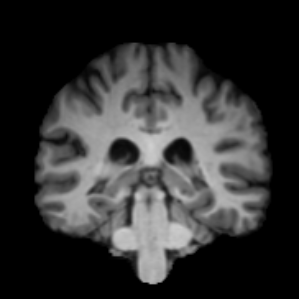

In [100]:
cv2_imshow(image_data_array[0])

In [ ]:
inception_res_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

In [85]:
################################ 엑셀 가져올 부분
sex_data = np.random.randint(2, size=(300, 1))
age_data = np.random.randint(20, 80, size=(300, 1))
image_order_data = np.arange(300)
diagnosis_data = np.concatenate([sex_data, age_data, image_order_data.reshape(-1, 1)], axis=1)
print(diagnosis_data.shape)

(300, 3)


In [94]:

inception_res_partial = models.Model(inputs=inception_res_model.input, outputs=inception_res_model.output)

input = tf.keras.layers.Input(shape=(299, 299, 3))

x = inception_res_partial(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)


dig_data_input = tf.keras.layers.Input(shape=(3,))
dig_data = tf.keras.layers.Dense(3, activation='relu')(dig_data_input)
x = tf.keras.layers.Concatenate(axis=-1)([x,dig_data])
x = tf.keras.layers.Dense(1027, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

dig_model = tf.keras.models.Model(inputs=[input,dig_data_input], outputs=x)

dig_model.summary()


Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 model_28 (Functional)       (None, 8, 8, 1536)           5433673   ['input_31[0][0]']            
                                                          6                                       
                                                                                                  
 global_average_pooling2d_1  (None, 1536)                 0         ['model_28[0][0]']            
 8 (GlobalAveragePooling2D)                                                                       
                                                                                           

In [95]:
diagnosis_data_result = np.random.randint(3, size=(300,))
diagnosis_data_result.shape


(300,)

In [96]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [97]:
print(image_data_array[0].shape)
print(diagnosis_data[0].shape)

(299, 299, 3)
(3,)


In [98]:
print(image_data_array.shape)
print(diagnosis_data.shape)
print(diagnosis_data_result.shape)



(300, 299, 299, 3)
(300, 3)
(300,)


In [99]:
dig_model.compile(optimizer=optimizer, loss='Sparse_categorical_crossentropy', metrics=['accuracy'])
dig_model(image_data_array, diagnosis_data)

ValueError: Layer "model_29" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(300, 299, 299, 3), dtype=uint8, numpy=
array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       ...,


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=uint8)>]